In [1]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

$\xi_1 \sim (a_1, \varphi_1^2),\ \eta_1 \sim (b_1, \psi_1^2)$

$\xi_2 \sim (a_2, \varphi_2^2),\ \eta_2 \sim (b_2, \psi_2^2)$

$H_0: \varphi_1^2 = \psi_1^2,\ \varphi_2^2 = \psi_2^2$

$H_1: \varphi_1^2 \neq \psi_1^2  \ or \ \ \varphi_2^2 \neq \psi_2^2$

### Если $H_0$ верна, то $\frac{S_{x_1}^2}{S_{y_1}^2} \sim F(n - 1, m - 1) \ и \ \frac{S_{x_2}^2}{S_{y_2}^2} \sim F(n - 1, m - 1)$

In [2]:
sigma1_length, sigma2_length = 5.722, 6.161
sigma1_width, sigma2_width = 4.612, 5.055
n1, n2 = 139, 1000

F_length = (sigma1_length ** 2) / (sigma2_length ** 2)
F_width = (sigma1_width ** 2) / (sigma2_width ** 2)

alpha = 0.05
df1, df2 = n1 - 1, n2 - 1
F_crit_lower = f.ppf(alpha / 2, df1, df2)
F_crit_upper = f.ppf(1 - alpha / 2, df1, df2)

print(f"F_статистики (length): {F_length:.3f}")
print(f"F_статистики (width): {F_width:.3f}")
print(f"Критические значения F: [{F_crit_lower:.3f}, {F_crit_upper:.3f}]")

F-статистика (длина): 0.863
F-статистика (ширина): 0.832
Критические значения F: [0.767, 1.272]


In [9]:
p_value_length = f.sf(F_length, df1, df2)
p_value_width = f.sf(F_width, df1, df2)
print(f"p_value_length = {p_value_length} > 0.05")
print(f"p_value_width = {p_value_width} > 0.05")

p_value_length = 0.8635945115489605 > 0.05
p_value_width = 0.9134225454551342 > 0.05


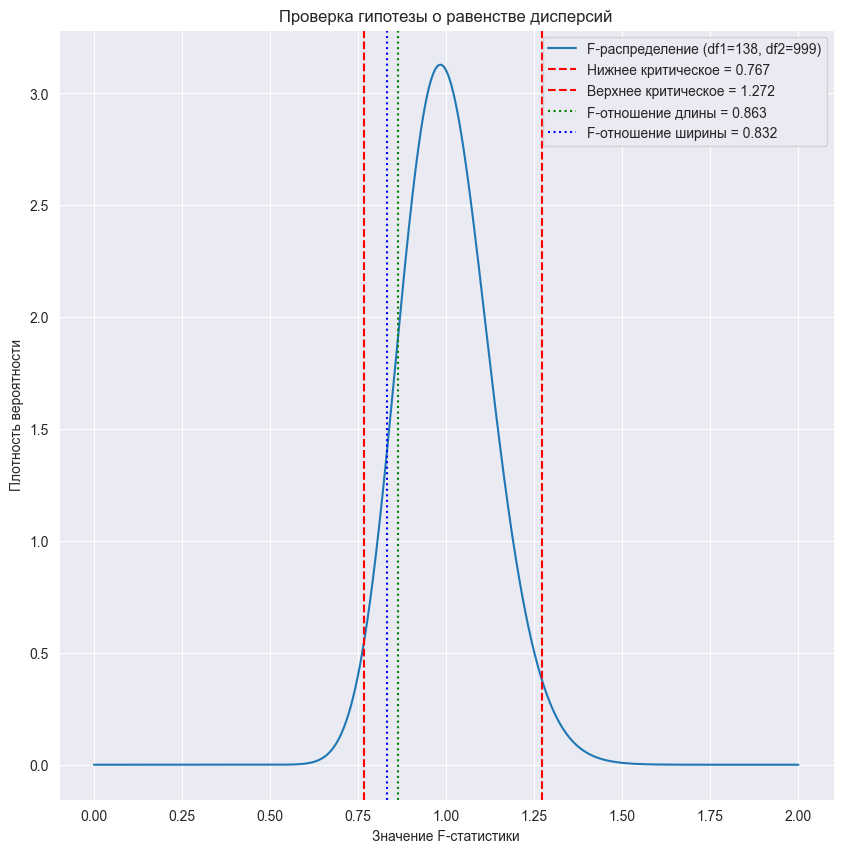

In [5]:
x = np.linspace(0, 2, 10000)
y = f.pdf(x, df1, df2)

plt.figure(figsize=(10, 10))
plt.plot(x, y, label=f'F-распределение (df1={df1}, df2={df2})')

# Критические значения
plt.axvline(x=F_crit_lower, color="red", linestyle='--', label=f'Нижнее критическое = {F_crit_lower:.3f}')
plt.axvline(x=F_crit_upper, color="red", linestyle='--', label=f'Верхнее критическое = {F_crit_upper:.3f}')

plt.axvline(x=F_length, color="green", linestyle=':', label=f'F-отношение длины = {F_length:.3f}')
plt.axvline(x=F_width, color="blue", linestyle=':', label=f'F-отношение ширины = {F_width:.3f}')

plt.title('Проверка гипотезы о равенстве дисперсий')
plt.xlabel('Значение F-статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

$$
\left.
\begin{aligned}
F_{0.025} &\leq F_{\text{length}} \leq F_{0.975} \\
F_{0.025} &\leq F_{\text{width}} \leq F_{0.975}
\end{aligned}
\right\}
\Rightarrow
\text{Нет оснований отвергнуть } H_0
$$

# $$ W = 1 - P(u_{\frac{\alpha}{2}} \le x \le u_{1 - \frac{\alpha}{2}}) $$


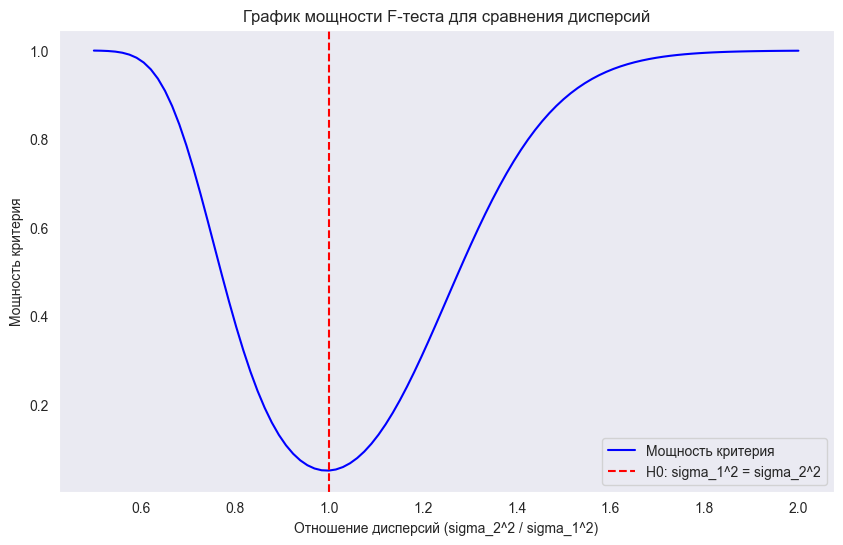

In [10]:
# Построение графика мощности
lambda_vals = np.linspace(0.5, 2, 100)
power = 1 - f.cdf(F_crit_upper, df1, df2, scale=lambda_vals) + f.cdf(F_crit_lower, df1, df2, scale=lambda_vals)

plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, power, label="Мощность критерия", color="blue")
plt.axvline(x=1, color="red", linestyle="--", label="H0: sigma_1^2 = sigma_2^2")
plt.xlabel("Отношение дисперсий (sigma_2^2 / sigma_1^2)")
plt.ylabel("Мощность критерия")
plt.title("График мощности F-теста для сравнения дисперсий")
plt.legend()
plt.grid()
plt.show()